In [1]:
%autosave 30

Autosaving every 30 seconds


In [2]:
# both do 1
# dinh do 3
# me do 2


# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from seaborn import scatterplot

In [4]:
# # access files from drive
# from google.colab import drive
# drive.mount('/content/drive')

## Data Import

In [5]:
# df = pd.read_csv('/content/drive/My Drive/waveform.data', header=None)
df = pd.read_csv('./data/waveform.data', header=None)
df_original = df.copy()

# Learning to Use Pandas

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


In [7]:
num_features = df.shape[1]
df.shape

(5000, 22)

In [8]:
# useful info about ranges, etc.
df.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.005144,0.338746,0.672438,0.991610,1.310888,1.997306,2.661806,2.659228,2.672086,2.988668,...,2.678908,2.648632,2.647668,2.000504,1.335032,1.000622,0.661482,0.357300,-0.021378,1.007800
std,1.010130,1.053657,1.187970,1.415239,1.678291,1.814187,2.015774,1.746067,1.663277,1.531506,...,1.651588,1.760113,2.018768,1.810684,1.669949,1.412815,1.197326,1.081337,0.997064,0.818946
min,-3.340000,-3.250000,-4.200000,-3.840000,-3.480000,-2.760000,-3.320000,-3.520000,-3.380000,-1.790000,...,-2.610000,-2.820000,-2.560000,-2.990000,-3.560000,-4.080000,-3.500000,-3.570000,-3.880000,0.000000
25%,-0.680000,-0.372500,-0.150000,-0.020000,0.037500,0.590000,1.110000,1.390000,1.470000,1.880000,...,1.480000,1.360000,1.120000,0.640000,0.070000,-0.010000,-0.180000,-0.350000,-0.690000,0.000000
50%,0.010000,0.340000,0.660000,0.940000,1.120000,1.860000,2.500000,2.720000,2.810000,3.000000,...,2.830000,2.700000,2.490000,1.820000,1.200000,0.940000,0.620000,0.350000,-0.030000,1.000000
75%,0.690000,1.050000,1.460000,1.970000,2.540000,3.340000,4.210000,3.940000,3.940000,4.080000,...,3.932500,3.980000,4.182500,3.330000,2.532500,1.960000,1.470000,1.072500,0.660000,2.000000
max,3.940000,3.880000,4.720000,5.750000,6.500000,7.620000,8.760000,7.840000,7.900000,7.630000,...,7.500000,7.750000,8.720000,7.860000,6.740000,6.200000,5.280000,4.650000,4.010000,2.000000


In [9]:
# names of the columns (feature names)
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21],
           dtype='int64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
 5   5       5000 non-null   float64
 6   6       5000 non-null   float64
 7   7       5000 non-null   float64
 8   8       5000 non-null   float64
 9   9       5000 non-null   float64
 10  10      5000 non-null   float64
 11  11      5000 non-null   float64
 12  12      5000 non-null   float64
 13  13      5000 non-null   float64
 14  14      5000 non-null   float64
 15  15      5000 non-null   float64
 16  16      5000 non-null   float64
 17  17      5000 non-null   float64
 18  18      5000 non-null   float64
 19  19      5000 non-null   float64
 20  20      5000 non-null   float64
 21  21      5000 non-null   int64  
dtype

In [11]:
# fetches feature 0
df[0]

0      -1.23
1      -0.69
2      -0.12
3       0.86
4       1.16
        ... 
4995   -0.65
4996   -0.02
4997    0.01
4998   -0.40
4999    0.63
Name: 0, Length: 5000, dtype: float64

In [12]:
# feature 0 and 5
df[[0,5]]

,0,5
0,-1.23,2.22
1,-0.69,3.25
2,-0.12,3.55
3,0.86,2.51
4,1.16,1.00
...,...,...
4995,-0.65,0.26
4996,-0.02,4.77
4997,0.01,1.93
4998,-0.40,-0.66


In [13]:
# feature 21 is label
df[21].unique()

array([2, 1, 0])

In [14]:
# percentage of each class
(df[21].value_counts())/5000

2    0.3392
0    0.3314
1    0.3294
Name: 21, dtype: float64

In [15]:
# find all examples where label == 2
df[21] == 2

0        True
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: 21, Length: 5000, dtype: bool

In [16]:
df[df[21] == 2]

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
5,-0.00,0.77,1.32,0.29,-1.28,0.84,1.60,1.55,2.93,4.76,...,4.89,2.81,2.37,3.68,-0.98,0.69,0.91,-1.80,0.39,2
7,-0.22,-0.91,-1.18,0.35,-1.92,-1.59,1.91,0.75,1.72,2.02,...,2.73,4.29,4.89,2.04,1.13,-0.66,-1.33,0.41,-0.75,2
8,-1.11,-1.14,-0.89,0.00,0.53,0.44,0.24,2.15,1.64,1.75,...,3.39,4.24,3.81,4.56,3.18,1.51,2.90,0.14,-0.12,2
9,-0.75,1.10,-1.90,1.43,0.47,0.40,0.86,3.51,2.62,4.50,...,0.75,3.23,1.08,-0.25,0.73,-0.41,-1.50,0.46,1.47,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,-1.35,0.49,-1.21,0.59,-0.41,0.59,-0.69,0.81,2.00,1.92,...,4.68,4.24,3.66,4.50,3.07,2.72,1.85,0.39,0.54,2
4987,0.36,1.27,0.02,0.84,0.33,0.15,0.42,2.17,2.41,4.38,...,3.69,2.92,3.82,2.50,1.12,-0.00,-0.67,-0.53,-0.87,2
4989,0.10,-0.55,0.82,0.93,0.14,0.80,2.19,1.62,2.33,4.60,...,4.41,3.95,4.34,2.73,1.52,2.19,1.53,2.60,-0.39,2
4993,-0.52,-0.27,0.04,0.91,-0.04,-1.33,1.60,2.34,0.82,2.57,...,5.08,3.87,5.38,6.00,1.06,1.28,0.93,1.78,0.67,2


In [17]:
# remove all examples where label != 2
df = df[df[3] < 0.5].copy()
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1
5,-0.00,0.77,1.32,0.29,-1.28,0.84,1.60,1.55,2.93,4.76,...,4.89,2.81,2.37,3.68,-0.98,0.69,0.91,-1.80,0.39,2
7,-0.22,-0.91,-1.18,0.35,-1.92,-1.59,1.91,0.75,1.72,2.02,...,2.73,4.29,4.89,2.04,1.13,-0.66,-1.33,0.41,-0.75,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,-1.07,0.68,0.65,-0.81,-0.73,0.86,-0.17,0.51,-0.03,1.63,...,3.64,5.12,4.94,4.10,2.90,1.78,0.80,0.60,-0.95,0
4983,-1.69,0.50,-0.02,-2.79,1.37,0.27,0.88,2.72,1.77,2.59,...,3.00,6.69,5.43,4.54,2.88,0.58,2.36,0.68,-0.15,2
4986,0.87,0.07,1.32,-0.05,0.95,0.35,2.22,6.05,3.00,6.16,...,2.59,3.02,1.34,1.88,0.76,-1.41,1.58,1.32,-0.91,1
4988,0.20,2.55,-0.28,0.23,0.54,-0.05,1.13,-1.04,1.75,1.41,...,4.99,5.85,6.58,4.65,3.86,3.18,1.44,1.61,0.10,0


In [18]:
df.reset_index(drop=True, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
2,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1
3,-0.00,0.77,1.32,0.29,-1.28,0.84,1.60,1.55,2.93,4.76,...,4.89,2.81,2.37,3.68,-0.98,0.69,0.91,-1.80,0.39,2
4,-0.22,-0.91,-1.18,0.35,-1.92,-1.59,1.91,0.75,1.72,2.02,...,2.73,4.29,4.89,2.04,1.13,-0.66,-1.33,0.41,-0.75,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,-1.07,0.68,0.65,-0.81,-0.73,0.86,-0.17,0.51,-0.03,1.63,...,3.64,5.12,4.94,4.10,2.90,1.78,0.80,0.60,-0.95,0
1908,-1.69,0.50,-0.02,-2.79,1.37,0.27,0.88,2.72,1.77,2.59,...,3.00,6.69,5.43,4.54,2.88,0.58,2.36,0.68,-0.15,2
1909,0.87,0.07,1.32,-0.05,0.95,0.35,2.22,6.05,3.00,6.16,...,2.59,3.02,1.34,1.88,0.76,-1.41,1.58,1.32,-0.91,1
1910,0.20,2.55,-0.28,0.23,0.54,-0.05,1.13,-1.04,1.75,1.41,...,4.99,5.85,6.58,4.65,3.86,3.18,1.44,1.61,0.10,0


# Split the Dataset

In [19]:
df = df_original.copy()

In [20]:
def split_train_test(df, train_size):
  # split the data into training and test set
  train_df = df.sample(frac=train_size, random_state=2)
  test_df = df.drop(train_df.index)
  train_df.reset_index(drop=True, inplace=True)
  test_df.reset_index(drop=True, inplace=True)
  return train_df, test_df

In [21]:
train_df, test_df = split_train_test(df, 0.80)
train_df.shape

(4000, 22)

In [22]:
train_X = train_df[np.arange(0, num_features-1)]
train_Y = train_df[num_features-1]
test_X = test_df[np.arange(0, num_features-1)]
test_Y = test_df[num_features-1]

# Data Exploration

In [23]:
correlations = train_X.corr()
correlations

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.000000,-0.003508,-0.014433,-0.026813,-0.024322,0.000431,-0.021447,-0.020455,0.003738,0.021424,...,0.009528,0.026217,0.013970,0.009992,-0.004845,0.018258,0.010491,0.021221,0.001757,-0.015318
1,-0.003508,1.000000,0.161519,0.218275,0.266433,0.273459,0.255172,0.213416,0.138950,0.006291,...,-0.204839,-0.257380,-0.237751,-0.204747,-0.176544,-0.116657,-0.098932,-0.083893,-0.064975,-0.005331
2,-0.014433,0.161519,1.000000,0.375251,0.423731,0.437313,0.440334,0.359039,0.204910,0.000017,...,-0.351685,-0.412292,-0.405367,-0.350740,-0.284519,-0.220499,-0.185560,-0.147859,-0.086655,-0.012625
3,-0.026813,0.218275,0.375251,1.000000,0.560694,0.575478,0.574437,0.436103,0.259690,-0.003982,...,-0.462242,-0.560019,-0.523406,-0.460047,-0.373879,-0.276910,-0.249301,-0.176365,-0.118412,-0.030556
4,-0.024322,0.266433,0.423731,0.560694,1.000000,0.657779,0.653238,0.532384,0.300482,0.014361,...,-0.527126,-0.646468,-0.611419,-0.532320,-0.437500,-0.321100,-0.279030,-0.215913,-0.142260,-0.026437
5,0.000431,0.273459,0.437313,0.575478,0.657779,1.000000,0.718998,0.609546,0.423072,0.131842,...,-0.488062,-0.653119,-0.660541,-0.627373,-0.538333,-0.430069,-0.388084,-0.292710,-0.178958,-0.014194
6,-0.021447,0.255172,0.440334,0.574437,0.653238,0.718998,1.000000,0.684074,0.518859,0.223441,...,-0.418809,-0.656107,-0.711551,-0.704145,-0.617490,-0.528744,-0.462449,-0.365226,-0.225572,-0.017051
7,-0.020455,0.213416,0.359039,0.436103,0.532384,0.609546,0.684074,1.000000,0.595897,0.384618,...,-0.239490,-0.524841,-0.648774,-0.711894,-0.672676,-0.602893,-0.530675,-0.417733,-0.250328,-0.028706
8,0.003738,0.138950,0.204910,0.259690,0.300482,0.423072,0.518859,0.595897,1.000000,0.532038,...,0.012890,-0.303968,-0.504653,-0.653386,-0.654793,-0.641475,-0.557467,-0.434812,-0.265696,-0.006541
9,0.021424,0.006291,0.000017,-0.003982,0.014361,0.131842,0.223441,0.384618,0.532038,1.000000,...,0.272619,-0.003776,-0.262523,-0.445512,-0.489485,-0.537052,-0.471340,-0.369357,-0.182252,0.018922


In [24]:
# get all correlations above 0.65 or below -0.65
sorted_correlations = correlations.unstack().sort_values(ascending=False)
pos_corr = sorted_correlations[sorted_correlations > 0.65]
pos_corr[pos_corr != 1]

15  14    0.721588
14  15    0.721588
5   6     0.718998
6   5     0.718998
7   6     0.684074
6   7     0.684074
13  14    0.671534
14  13    0.671534
16  14    0.669238
14  16    0.669238
16  15    0.663677
15  16    0.663677
4   5     0.657779
5   4     0.657779
6   4     0.653238
4   6     0.653238
dtype: float64

- Some features are quite highly correlated. 
  - This information is useful as it means PCA will probably work well on this dataset.
  - Even better news as it means we have a higher chance to reduce the curse of dimensionality.
    - Which can strongly affect kNN.

# Standardisation
- Standardise the data using the z-score for each value. 

- This is best for kNN as it centers the values around 0.

- Makes it easier to identify outliers. 
  - Any example with a value above 3 means it is more than 3 standard deviations away from the mean. 

In [25]:
mean = np.mean(train_X, axis=0)
std = np.std(train_X)
train_X = (train_X-mean)/std
(train_X > 3).sum() + (train_X < -3).sum()

0      7
1      8
2     12
3      3
4      1
5      1
6      1
7      1
8      5
9      5
10     4
11     2
12     1
13     1
14     1
15     1
16     4
17     6
18     7
19    11
20    11
dtype: int64

<AxesSubplot: >

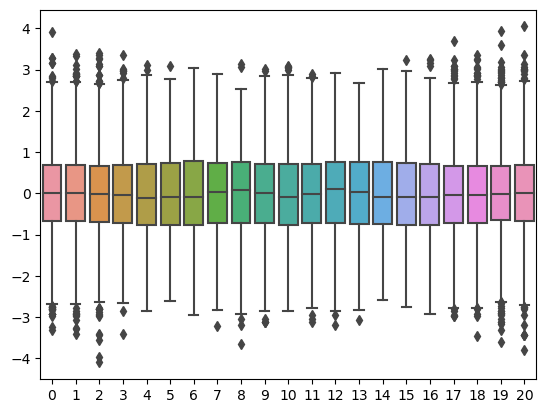

In [26]:
sns.boxplot(train_X)

We can't conclude much from the above box plot as it shows the outliers for different features.
- An example that is an outlier for feature 1 is likely not for all other 21 features.

So let's combine the z-scores of all examples and divide by the number of features to get a scalar for each example.

-0.5185385256038143
0.509571329491487


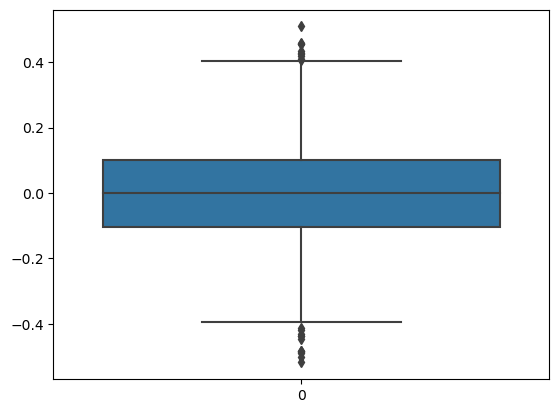

In [27]:
row_sums = train_X.sum(axis=1)
sns.boxplot(row_sums/num_features)

print(min(row_sums/num_features))
print(max(row_sums/num_features))

From this box-plot, we can infer that there are no outliers.
- No example lies more than 0.6 standard deviations away from the mean.

# kNN Implementation

In [28]:
def precompute_distances(X):
  num_samples = X.shape[0]
  distance_matrix = np.zeros((num_samples, num_samples))
  for i in range(num_samples):
    distance_matrix[i] = np.sqrt(np.sum((X.iloc[i] - X)**2, axis=1))
  return distance_matrix

In [ ]:
def cross_validate_knn(X, Y, k_neighbors, k_folds=5):
    # Get fold indices
    folds = kfold_indices(X, k_folds)
    fold_accuracies = []

    for train_idx, val_idx in folds:
        # Split data into train and validation
        X_train = X.iloc[train_idx]
        X_val = X.iloc[val_idx]
        Y_train = Y.iloc[train_idx]
        Y_val = Y.iloc[val_idx]

        # Precompute distances for this fold
        X_combined = pd.concat([X_train, X_val])
        distances = precompute_distances(X_combined)

        # Make predictions for validation set
        Y_pred = []
        for i in range(len(val_idx)):
            val_global_idx = train_idx.shape[0] + i
            pred = knn_prediction(distances, Y_train, val_global_idx, k_neighbors)
            Y_pred.append(pred)

        # Calculate accuracy for this fold
        fold_accuracy = calc_accuracy(Y_pred, Y_val)
        fold_accuracies.append(fold_accuracy)

    # Return mean accuracy across folds
    return np.mean(fold_accuracies)

## Flawed Implementation

In [29]:
def knn_train(x_index, y, distances, k):
    # # Get the row of precomputed distances for the given index
    dist_row = distances[x_index]
    # # Set the distance to itself as infinity so it won’t be considered
    dist_row[x_index] = np.inf

    # Sort distances and get indices of k nearest neighbors
    nearest_indices = np.argsort(dist_row)[:k]
    nearest_labels = y[nearest_indices]

    # Count occurrences of each label among nearest neighbors
    label_counts = np.bincount(nearest_labels, minlength=3)
    return np.argmax(label_counts)

In [30]:
distances = precompute_distances(train_X)
distances

array([[0.        , 8.2842442 , 5.34743562, ..., 7.06745913, 9.09872025,
        6.30435707],
       [8.2842442 , 0.        , 5.96009574, ..., 5.02990336, 4.0186454 ,
        5.30406803],
       [5.34743562, 5.96009574, 0.        , ..., 4.99744661, 6.52270001,
        4.34533465],
       ...,
       [7.06745913, 5.02990336, 4.99744661, ..., 0.        , 5.53943868,
        3.98395529],
       [9.09872025, 4.0186454 , 6.52270001, ..., 5.53943868, 0.        ,
        5.06585059],
       [6.30435707, 5.30406803, 4.34533465, ..., 3.98395529, 5.06585059,
        0.        ]])

In [31]:
x_index = 1203
print('Predicted label:', knn_train(x_index, train_Y, distances, k=200))
print('Actual label:', train_Y.loc[0])

Predicted label: 1
Actual label: 1


In [32]:
def calc_error(X, Y, distances, k, num_examples=100):
    errors = 0
    sampled_indices = np.random.choice(len(X), size=num_examples, replace=False)
    for index in sampled_indices:
        y_hat = knn_train(index, Y, distances, k)
        y = Y[index]
        if y_hat != y:
            errors += 1
    return 1 - (errors / num_examples)

def calc_accuracies(X, Y, distances, k_values, num_examples=100):
    accuracies = np.array([calc_error(X, Y, distances, k, num_examples) for k in k_values])
    return accuracies

In [33]:
# max_k = 200
# num_examples = 600
# k_values = np.arange(1, max_k + 1)
# # np.random.seed(1)

# k_accuracies = calc_accuracies(train_X, train_Y, distances, k_values, num_examples)

# best_k = k_values[np.argmax(k_accuracies)]
# best_accuracy = k_accuracies.max()

# print(f'Best value of k={best_k} with accuracy={best_accuracy}')

In [34]:
def plot_k_values(k_values, k_accuracies, num_examples, best_k, marker=''):
  plt.plot(k_values, k_accuracies, label='Accuracy', marker=marker)
  plt.title(f"Accuracy when tested on {num_examples} random training examples")
  plt.xlabel("k value")
  plt.ylabel("Accuracy")
  plt.ylim(0.3, 1)
  plt.grid(color='#aaa', linestyle=':', linewidth=0.5)

  plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k={best_k}')

  plt.legend()
  plt.show()

In [35]:
# plot_k_values(k_values, k_accuracies, num_examples, best_k)

In [36]:
# calc_error(train_X, train_Y, distances, best_k, 4000)

In [37]:
# # Get the indices of the top 10 k values
# best_indices = np.argsort(k_accuracies)[-10:]
# best_k_values = k_values[best_indices]

# # Rerun the calc_accuracies function for the best k values over entire set
# best_accuracies = calc_accuracies(train_X, train_Y, distances, best_k_values, 4000)

# print(best_k_values)
# print(best_accuracies)
# print()
# print(f"Best k value: {best_k_values[np.argmax(best_accuracies)]}, has accuracy of: {best_accuracies.max()}")

In [38]:
# sorted_indices = np.argsort(best_k_values)
# best_k_values = best_k_values[sorted_indices]
# best_accuracies = best_accuracies[sorted_indices]
# actual_best_k = best_k_values[np.argmax(best_accuracies)]

# plot_k_values(best_k_values, best_accuracies, 4000, actual_best_k, marker='.')

In [ ]:
def get_neighbors(distance_matrix, x_idx, k):
    distances = distance_matrix[x_idx]
    sorted_indices = np.argsort(distances)
    neighbors = sorted_indices[1:k+1]
    return neighbors

def knn_train(distance_matrix, Y, x_idx, k):
    neighbors_indices = get_neighbors(distance_matrix, x_idx, k)
    output_values = Y.iloc[neighbors_indices]
    prediction = np.bincount(output_values, minlength=3)
    return np.argmax(prediction)

def knn_prediction(X, Y, x, k):
    print(1)
    distances = np.sqrt(np.sum((X - x)**2, axis=1))
    print(2)
    sorted_indices = np.argsort(distances)
    print(3)
    neighbors_indices = sorted_indices[:k]
    print(4, neighbors_indices)
    neighbors_labels = Y.iloc[neighbors_indices]
    print(5)
    prediction = np.bincount(neighbors_labels, minlength=3)
    print(6)
    return np.argmax(prediction)

In [ ]:
distance_matrix = precompute_distances(train_X)

In [ ]:
knn_train(distance_matrix, train_Y, 0, 5)

1

## k-fold Cross-Validation implementation

In [92]:
def kfold_indices(X, k_folds):
    fold_size = len(X) // k_folds
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    folds = []
    for i in range(k_folds):
        validation_indices = indices[i*fold_size:(i+1)*fold_size]
        train_indices = np.concatenate([indices[:i*fold_size], indices[(i+1)*fold_size:]])
        folds.append((train_indices, validation_indices))
    return folds

# Choose k_folds
k_folds = 10
folds = kfold_indices(train_X, k_folds)
print(f"Fold 1 - Train size: {len(folds[0][0])}, Validation size: {len(folds[0][1])}")
# print(f"Fold 1 - Train indices: {folds[0][0]}")
# print(f"Fold 1 - Validation indices: {folds[0][1]}")

Fold 1 - Train size: 3600, Validation size: 400


In [ ]:
def calc_accuracy(Y_pred, Y):
    errors = 0
    for i,pred in enumerate(Y_pred):
        actual = Y[i]
        if pred != actual:
            errors += 1
    return 1 - (errors / len(Y))


# def accuracy_metric(actual, predicted):
#     correct = 0
#     for i in range(len(actual)):
#         if actual[i] == predicted[i]:
#             correct += 1
#     return correct / len(actual) * 100.0

# # Test: check the accuracy of the model
# actual =    [0, 1, 1, 0, 0, 1, 0, 1, 1, 1]
# predicted = [0, 1, 0, 0, 0, 1, 0, 1, 1, 1]
# accuracy = accuracy_metric(actual, predicted)
# print(f'Accuracy: {accuracy}')

0.823